## Voting 분류 모델을 구현할 수있는 API
* Argument(인자)
> * estimators : voting 분류 모델에 사용할 서브 모델들
>> * List 형식이며 각각의 원소는 tuple(name, etimator)로 이루어짐
> * voting : voting 분류 모델의 클래스 예측 방식
>> * {‘hard’, ‘soft’}, default=’hard’
> * n_jobs : 병렬 학습에 적용할 쓰레드의 개수
>> * -1 은 해당 시스템에서 사용 가능한 최대의 쓰레드 사용

* Method(함수)
> * fit(X, y) : 학습 데이터를 이용하여 모델을 학습
> * predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측 값(y) 반환
> * score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능(정확도) 반환

* Attribute(속성)
> * classes_ : 학습에 사용된 클래스의 라벨 정보
> * estimators_ : 학습에 참여한 sub 모델 객체


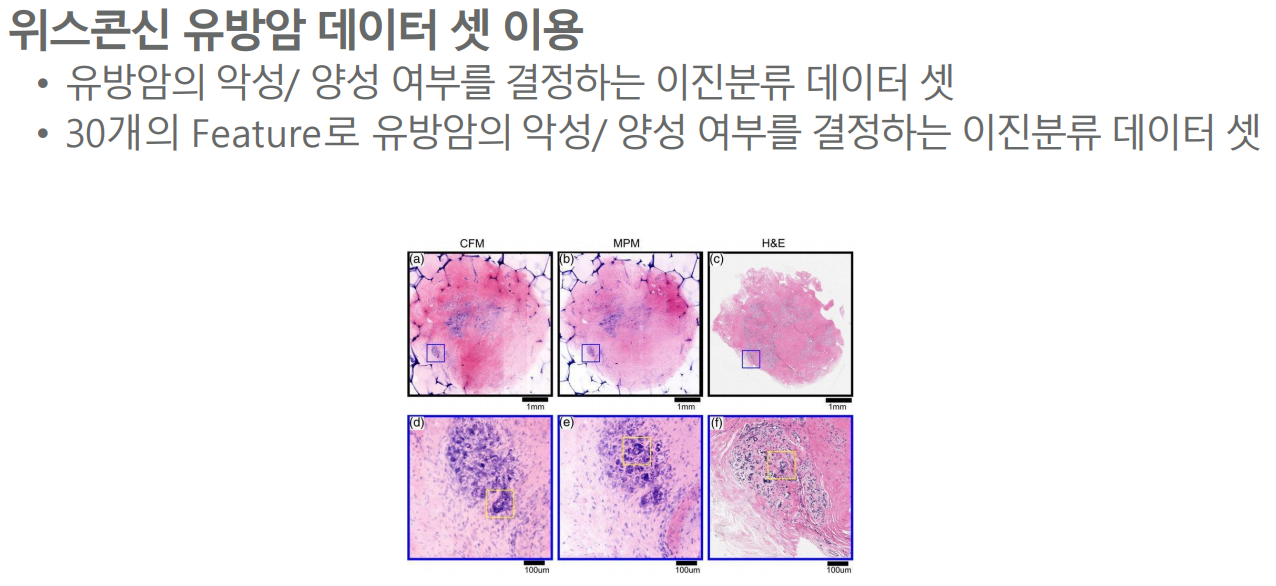

In [1]:
# 위스콘신 유방암 데이터 셋 분석
# load_breast_cancer() API를 이용하여 데이터 셋 load 
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names) 
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state= 156)

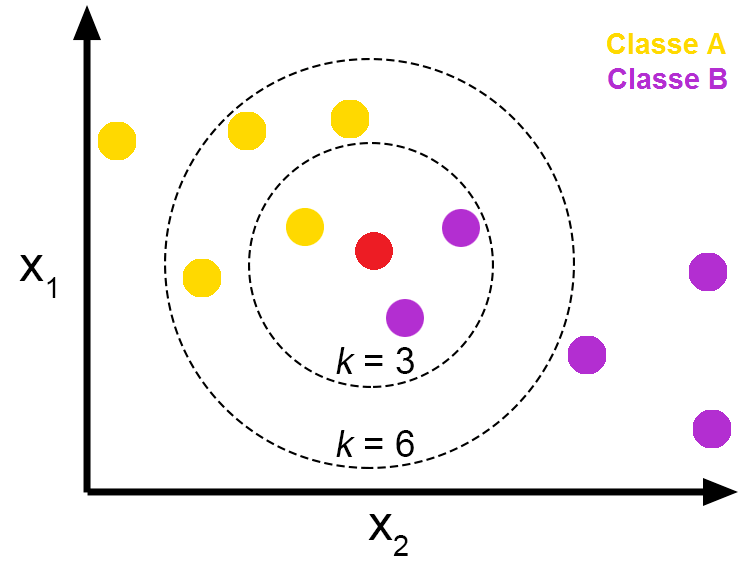

In [3]:
# 서브모델로 Logistic Regression, KNN 사용
# 서브모델 객체 생성
# 서브모델 객체 이용하여 voting 분류기 모델 객체 생성
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

In [4]:
# voting 분류기 모델 학습 및 성능 측정
from sklearn.metrics import accuracy_score

vo_clf.fit(x_train , y_train) 
pred = vo_clf.predict(x_test)
print('Voting Classifier Accuracy: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting Classifier Accuracy: 0.9474


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
# voting 분류기 모델 학습 및 성능 측정
# 서브 모델 각각에 학습 데이터를 이용하여 학습 및 성능 측정
# voting 분류기와 성능 비교
classifiers = [lr_clf, knn_clf]
for classifier in classifiers: 
  classifier.fit(x_train, y_train) 
  pred = classifier.predict(x_test)
  
  class_name = classifier.__class__.__name__
  
  print('{0} Accuracy: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression Accuracy: 0.9386
KNeighborsClassifier Accuracy: 0.9386
